<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Create-metadata-sheet" data-toc-modified-id="Create-metadata-sheet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create metadata sheet</a></span></li><li><span><a href="#Get-annotations" data-toc-modified-id="Get-annotations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get annotations</a></span></li><li><span><a href="#Remove-reference-conditions" data-toc-modified-id="Remove-reference-conditions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove reference conditions</a></span></li><li><span><a href="#Check-data-quality" data-toc-modified-id="Check-data-quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check data quality</a></span></li><li><span><a href="#Check-replicate-correlations" data-toc-modified-id="Check-replicate-correlations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Check replicate correlations</a></span></li><li><span><a href="#Final-touches" data-toc-modified-id="Final-touches-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final touches</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import itertools
import os

# Load Data

In [2]:
# Load dataset
DATA_DIR='../../data/'
DF_data = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_exprdata_20151029.txt'),sep='\t',skiprows=6,index_col=0)
DF_data = DF_data.drop(['Gene name','Geneid/Contrast_id'],axis=1)

In [3]:
# Add original column names
colnames = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_exprdata_20151029.txt'),
                       sep='\t',skiprows=1,nrows=1,header=None)
colnames = colnames.loc[0].values[3:-1]

In [4]:
DF_labels = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_exprdata_20151029.txt'),sep='\t',nrows=3,header=None).T

In [5]:
DF_labels = DF_labels.drop([0,1,2])
DF_labels.columns = ['test_vs_ref','test','ref']

In [6]:
# Add subscript # for replicates
seen = {name:0 for name in colnames}
newnames = []
for name in colnames:
    newnames.append(name+'_{}'.format(seen[name]))
    seen[name] += 1
    
DF_data.columns = newnames

# Create metadata sheet

In [7]:
DF_metadata = pd.DataFrame([(x[5:-2],x[-1]) for x in DF_data.columns],index=DF_data.columns,
                          columns=['condition_id','rep'])

In [8]:
# Add original column names
groupnames = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_exprdata_20151029.txt'),
                       sep='\t',skiprows=2,nrows=1,header=None)
groupnames = groupnames.loc[0].values[3:-1]

In [9]:
DF_metadata['project_id'] = groupnames

In [10]:
DF_metadata.sort_values(['condition_id','rep'])

,condition_id,rep,project_id
test_E-MEXP-1001_art_mating_F_phenocopy_0,E-MEXP-1001_art_mating_F_phenocopy,0,ref_E-MEXP-1001_suspension_exp
test_E-MEXP-1001_art_mating_F_phenocopy_1,E-MEXP-1001_art_mating_F_phenocopy,1,ref_E-MEXP-1001_suspension_exp
test_E-MEXP-1001_biofilm_0,E-MEXP-1001_biofilm,0,ref_E-MEXP-1001_suspension_exp
test_E-MEXP-1001_biofilm_1,E-MEXP-1001_biofilm,1,ref_E-MEXP-1001_suspension_exp
test_E-MEXP-1001_suspension_exp_0,E-MEXP-1001_suspension_exp,0,ref_E-MEXP-1001_suspension_exp
...,...,...,...
ref_GSE7326_controlpHSG415_1h50m_0,SE7326_controlpHSG415_1h50m,0,ref_GSE7326_controlpHSG415_0h
ref_GSE7326_controlpHSG415_3h_0,SE7326_controlpHSG415_3h,0,ref_GSE7326_controlpHSG415_0h
ref_GSE9923_BW25113_luxS_planktonic_37C_0,SE9923_BW25113_luxS_planktonic_37C,0,ref_GSE9923_BW25113_wt_planktonic_30C
ref_GSE9923_BW25113_sdiA_biofilm_30C_0,SE9923_BW25113_sdiA_biofilm_30C,0,ref_GSE9923_BW25113_wt_planktonic_30C


# Get annotations

In [11]:
DF_labels = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_exprdata_20151029.txt'),sep='\t',nrows=3,header=None).T

DF_labels = DF_labels.drop([0,1,2])
DF_labels.columns = ['test_vs_ref','test','ref']
DF_labels = DF_labels[DF_labels.test_vs_ref.notnull()]

In [12]:
# Get annotations
refannot = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_refannot_20151029.txt'),sep='\t')
refannot.RefAnnotation = refannot.RefAnnotation.str.replace('O157:H7','O157-H7')
refannot = pd.concat([refannot,refannot.RefAnnotation.str.split(':',expand=True)],axis=1)

test_annot = pd.read_csv(os.path.join(DATA_DIR,'ecoli_compendium_data/colombos_ecoli_testannot_20151029.txt'),sep='\t')
test_annot.TestAnnotation = test_annot.TestAnnotation.str.replace('O157:H7','O157-H7')
test_annot = pd.concat([test_annot,test_annot.TestAnnotation.str.split(':',expand=True)],axis=1)

In [15]:
refannot = refannot.drop('RefAnnotation',axis=1)
refannot = refannot.rename(columns={0:'variable',1:'ref_value'})

test_annot = test_annot.drop('TestAnnotation',axis=1)
test_annot = test_annot.rename(columns={0:'variable',1:'test_value'})

In [16]:
ref_labels = pd.merge(DF_labels,refannot,left_on='test_vs_ref',right_on='ContrastName',how='outer')
test_labels = pd.merge(DF_labels,test_annot,left_on='test_vs_ref',right_on='ContrastName',how='outer')

In [17]:
final_annot = pd.merge(ref_labels,test_labels,on=['test','variable'],how='outer')
#final_annot = final_annot[['test','variable','ref_value','test_value']]

In [18]:
final_annot = final_annot[final_annot.ref_value != final_annot.test_value]

In [19]:
final_annot.to_csv(os.path.join(DATA_DIR,'colombos','annotations.csv'))

# Remove reference conditions

In [20]:
DF_data = DF_data[DF_data.columns[~DF_data.columns.str.startswith('ref')]]

In [21]:
DF_data.shape

(4321, 3962)

# Check data quality

In [22]:
# Check for items with replicates
keep_cols = []
for k,v in seen.items():
    if v > 1:
        keep_cols.append(k)

DF_reps = DF_data[sorted([col for col in DF_data.columns if col[:-2] in keep_cols])]

In [23]:
# Only use platforms with <300 null values
good_platforms = DF_reps.columns[DF_reps.isnull().sum(axis=0) < 300]
# Only include genes with all non-null values
good_genes = DF_reps.index[DF_reps[good_platforms].notnull().all(axis=1)]
good_data = DF_reps.loc[good_genes,good_platforms]
print('Old dataset size:',DF_data.shape)
print('New dataset size:',good_data.shape)

Old dataset size: (4321, 3962)
New dataset size: (3592, 3133)


In [24]:
good_data_conds = pd.Series([x[:-2] for x in good_data.columns]).unique()

# Check replicate correlations

In [25]:
from scipy import stats

In [26]:
import numpy as np

In [27]:
rep_corrs = {}
rand_corrs = {}
for c1,c2 in tqdm(itertools.combinations(good_data.columns,2),total = len(list(itertools.combinations(good_data.columns,2)))):
    if c1[:-2] == c2[:-2]:
        rep_corrs[(c1,c2)] = stats.pearsonr(good_data[c1],good_data[c2])[0]
    else:
        if np.random.rand() < 0.001:
            rand_corrs[(c1,c2)] = stats.pearsonr(good_data[c1],good_data[c2])[0]

<ipython-input-27-cbad402dabfc>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for c1,c2 in tqdm(itertools.combinations(good_data.columns,2),total = len(list(itertools.combinations(good_data.columns,2)))):


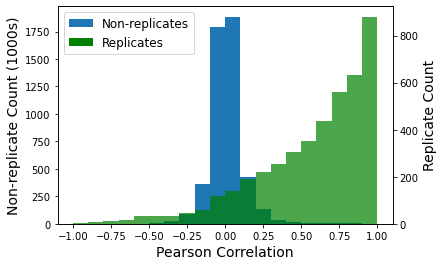

In [28]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.hist(rand_corrs.values(),range=(-1,1),bins=20,label='Non-replicates')
ax.hist([],color='green',label='Replicates')
ax2.hist(rep_corrs.values(),range=(-1,1),bins=20,alpha=.7,color='green')
ax.set_xlabel('Pearson Correlation',fontsize=14)
ax.set_ylabel('Non-replicate Count (1000s)',fontsize=14)
ax2.set_ylabel('Replicate Count',fontsize=14)
ax.legend(loc=2,fontsize=12)
plt.savefig('test.png',dpi=600)

In [29]:
reps2 = set([c for k,v in rep_corrs.items() if v > 0.2 for c in k])

In [30]:
print(len(reps2))

3016


# Final touches

In [ ]:
good_data = good_data[set(reps2)]
good_data.to_csv(os.path.join(DATA_DIR,'colombos','colombos.csv'))

In [ ]:
DF_metadata.loc[good_data.columns].to_csv(os.path.join(DATA_DIR,'colombos','metadata.csv'))

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(good_data.transpose()),index=good_data.columns)
DF_components = pd.DataFrame(pca.components_.T,index=good_data.index)

In [ ]:
var_cutoff = 0.95

fig,ax = plt.subplots(figsize=(5,3))
pca_var = np.cumsum(pca.explained_variance_ratio_)
ax.plot(pca_var)
dims = np.where(pca_var > var_cutoff)[0][0] + 1
ax.vlines(dims,0,1,linestyles='dotted')
ax.hlines(var_cutoff,0,len(good_data.columns),linestyles='dotted')
ax.set_ylim(0,1)
ax.set_xlim(0,len(good_data.columns))
ax.set_ylabel('Fraction of Explained Variance')
ax.set_xlabel('Number of Dimensions')
print('Number of dimensions for 95% of variance:',dims)
None